<a href="https://colab.research.google.com/github/yamihe19/Briefing-Notes-Catering-Event-/blob/main/Code_Project_ResearchArticle_ipynbipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROJECT: Linear discriminant analysis of phenotypic data for classifying autism spectrum disorder by diagnosis and sex

### Group Members:
- Mary Alexandra Garcia 100391387
- Yamileth Hercules 100385215

## a. Purpose

Recreate the results of the article using LDA

__b. Objectives:__<br>
    
1. EDA (15 points): this will include a description of the data, inclusion and exclusion criteria to filter the data for your classification tasks.
2. Perform LDA analysis (15 points).
3. Perform another classification analysis (15 points).
4. Conclusion on the performance of LDA in comparison to the technique that you use.


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In this part we evaluated the datasets of the kaggle folder and we found that the important one is 'pheno_train.csv' as the article mentioned that they did all the preprocessing.


In [ ]:
df= pd.read_csv('pheno_train.csv')
pd.set_option('display.max_columns', None)
df.head()


,Unnamed: 0,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,PIQ,FIQ_TEST_TYPE,VIQ_TEST_TYPE,PIQ_TEST_TYPE,ADI_R_SOCIAL_TOTAL_A,ADI_R_VERBAL_TOTAL_BV,ADI_RRB_TOTAL_C,ADI_R_ONSET_TOTAL_D,ADI_R_RSRCH_RELIABLE,ADOS_MODULE,ADOS_TOTAL,ADOS_COMM,ADOS_SOCIAL,ADOS_STEREO_BEHAV,ADOS_RSRCH_RELIABLE,ADOS_GOTHAM_SOCAFFECT,ADOS_GOTHAM_RRB,ADOS_GOTHAM_TOTAL,ADOS_GOTHAM_SEVERITY,SRS_VERSION,SRS_RAW_TOTAL,SRS_AWARENESS,SRS_COGNITION,SRS_COMMUNICATION,SRS_MOTIVATION,SRS_MANNERISMS,SCQ_TOTAL,AQ_TOTAL,COMORBIDITY,CURRENT_MED_STATUS,MEDICATION_NAME,OFF_STIMULANTS_AT_SCAN,VINELAND_RECEPTIVE_V_SCALED,VINELAND_EXPRESSIVE_V_SCALED,VINELAND_WRITTEN_V_SCALED,VINELAND_COMMUNICATION_STANDARD,VINELAND_PERSONAL_V_SCALED,VINELAND_DOMESTIC_V_SCALED,VINELAND_COMMUNITY_V_SCALED,VINELAND_DAILYLVNG_STANDARD,VINELAND_INTERPERSONAL_V_SCALED,VINELAND_PLAY_V_SCALED,VINELAND_COPING_V_SCALED,VINELAND_SOCIAL_STANDARD,VINELAND_SUM_SCORES,VINELAND_ABC_STANDARD,VINELAND_INFORMANT,WISC_IV_VCI,WISC_IV_PRI,WISC_IV_WMI,WISC_IV_PSI,WISC_IV_SIM_SCALED,WISC_IV_VOCAB_SCALED,WISC_IV_INFO_SCALED,WISC_IV_BLK_DSN_SCALED,WISC_IV_PIC_CON_SCALED,WISC_IV_MATRIX_SCALED,WISC_IV_DIGIT_SPAN_SCALED,WISC_IV_LET_NUM_SCALED,WISC_IV_CODING_SCALED,WISC_IV_SYM_SCALED,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI,anat_cnr,anat_efc,anat_fber,anat_fwhm,anat_qi1,anat_snr,func_efc,func_fber,func_fwhm,func_dvars,func_outlier,func_quality,func_mean_fd,func_num_fd,func_perc_fd,func_gsr,qc_rater_1,qc_notes_rater_1,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP
0,814,51131,815,51131,NYU,NYU_0051131,2,19.7300,1,NaN,68.0,119.0,112.0,123.0,WASI,WASI,WASI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9999.0,-9999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,-9999.00,10.674176,0.616051,89.045514,3.509732,0.067764,12.866070,0.534295,78.296410,1.765660,1.018414,0.006217,0.014129,0.032827,2.0,1.104972,-0.001329,OK,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
1,162,50237,163,50237,TRINITY,Trinity_0050237,1,21.4200,1,R,NaN,118.0,109.0,116.0,WASI,NaN,NaN,20.0,18.0,5.0,5.0,1.0,4.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7.004004,1.674990,11.113986,4.425869,0.075520,10.833468,0.428382,137.815548,1.955725,1.064568,0.002349,0.008713,0.078301,7.0,4.635762,0.010631,OK,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
2,863,51185,864,51185,STANFORD,Stanford_0051185,2,8.2464,1,R,NaN,119.0,107.0,129.0,WASI,WASI,WASI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,9.180373,14.838937,0.029120,2.824676,0.241977,9.159445,0.555808,59.038003,2.772167,1.302140,0.007001,0.007197,0.181608,69.0,28.630705,0.036467,OK,NaN,maybe,skull-striping fail;,OK,NaN,OK,NaN,OK,NaN,1
3,668,50978,669,50978,NYU,NYU_0050978,1,9.5800,1,NaN,44.0,142.0,126.0,149.0,WASI,WASI,WASI,16.0,17.0,5.0,3.0,1.0,3.0,7.0,0.0,7.0,3.0,1.0,6.0,4.0,10.0,6.0,1.0,92.0,NaN,NaN,NaN,NaN,NaN,15.0,NaN,Mood Disorder NOS,0,NaN,NaN,13.0,12.0,16.0,92.0,17.0,12.0,14.0,95.0,9.0,13.0,13.0,82.0,269.0,88.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,13.71,9.087565,0.517920,78.004528,3.220905,0.055056,10.456115,0.485962,142.036348,2.057008,0.938920,0.006253,0.011202,0.030118,1.0,0.552486,-0.010039,OK,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,0
4,508,50653,509,50653,CMU,CMU_a_0050653,1,30.0000,1,R,NaN,134.0,131.0,129.0,WISC,WISC,WISC,20.0,13.0,3.0,1.0,1.0,4.0,18.0,5.0,13.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN

## 1. EDA:this will include a description of the data, inclusion and exclusion criteria to filter the data for your classification tasks.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931 entries, 0 to 930
Columns: 104 entries, Unnamed: 0 to SUB_IN_SMP
dtypes: float64(77), int64(8), object(19)
memory usage: 756.6+ KB


We cannot see the info because there are too many variables in the dataset. So for now we are going to continue in this way.

In [ ]:
df.DX_GROUP.value_counts()

2    477
1    454
Name: DX_GROUP, dtype: int64

The data set it is not exactly balance, but it is almost balance.


<Axes: xlabel='DX_GROUP', ylabel='count'>

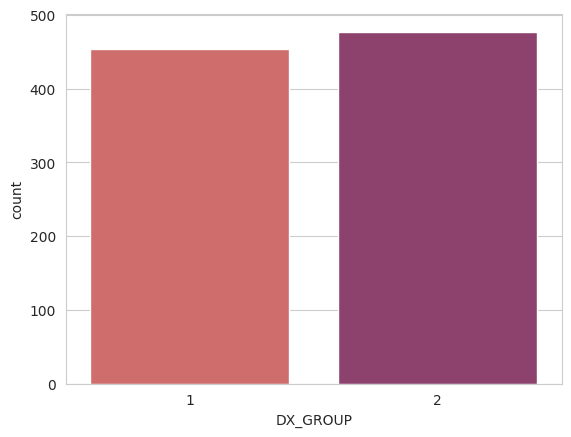

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x ='DX_GROUP', data = df, palette = 'flare')

We cannot see a  issue with the groups. The dataset is almost balance

In [ ]:
df.shape

(931, 104)

There are 931 rows and 104 columns

In [ ]:
df.head()

,Unnamed: 0,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,PIQ,FIQ_TEST_TYPE,VIQ_TEST_TYPE,PIQ_TEST_TYPE,ADI_R_SOCIAL_TOTAL_A,ADI_R_VERBAL_TOTAL_BV,ADI_RRB_TOTAL_C,ADI_R_ONSET_TOTAL_D,ADI_R_RSRCH_RELIABLE,ADOS_MODULE,ADOS_TOTAL,ADOS_COMM,ADOS_SOCIAL,ADOS_STEREO_BEHAV,ADOS_RSRCH_RELIABLE,ADOS_GOTHAM_SOCAFFECT,ADOS_GOTHAM_RRB,ADOS_GOTHAM_TOTAL,ADOS_GOTHAM_SEVERITY,SRS_VERSION,SRS_RAW_TOTAL,SRS_AWARENESS,SRS_COGNITION,SRS_COMMUNICATION,SRS_MOTIVATION,SRS_MANNERISMS,SCQ_TOTAL,AQ_TOTAL,COMORBIDITY,CURRENT_MED_STATUS,MEDICATION_NAME,OFF_STIMULANTS_AT_SCAN,VINELAND_RECEPTIVE_V_SCALED,VINELAND_EXPRESSIVE_V_SCALED,VINELAND_WRITTEN_V_SCALED,VINELAND_COMMUNICATION_STANDARD,VINELAND_PERSONAL_V_SCALED,VINELAND_DOMESTIC_V_SCALED,VINELAND_COMMUNITY_V_SCALED,VINELAND_DAILYLVNG_STANDARD,VINELAND_INTERPERSONAL_V_SCALED,VINELAND_PLAY_V_SCALED,VINELAND_COPING_V_SCALED,VINELAND_SOCIAL_STANDARD,VINELAND_SUM_SCORES,VINELAND_ABC_STANDARD,VINELAND_INFORMANT,WISC_IV_VCI,WISC_IV_PRI,WISC_IV_WMI,WISC_IV_PSI,WISC_IV_SIM_SCALED,WISC_IV_VOCAB_SCALED,WISC_IV_INFO_SCALED,WISC_IV_BLK_DSN_SCALED,WISC_IV_PIC_CON_SCALED,WISC_IV_MATRIX_SCALED,WISC_IV_DIGIT_SPAN_SCALED,WISC_IV_LET_NUM_SCALED,WISC_IV_CODING_SCALED,WISC_IV_SYM_SCALED,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI,anat_cnr,anat_efc,anat_fber,anat_fwhm,anat_qi1,anat_snr,func_efc,func_fber,func_fwhm,func_dvars,func_outlier,func_quality,func_mean_fd,func_num_fd,func_perc_fd,func_gsr,qc_rater_1,qc_notes_rater_1,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP
0,814,51131,815,51131,NYU,NYU_0051131,2,19.7300,1,NaN,68.0,119.0,112.0,123.0,WASI,WASI,WASI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9999.0,-9999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,-9999.00,10.674176,0.616051,89.045514,3.509732,0.067764,12.866070,0.534295,78.296410,1.765660,1.018414,0.006217,0.014129,0.032827,2.0,1.104972,-0.001329,OK,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
1,162,50237,163,50237,TRINITY,Trinity_0050237,1,21.4200,1,R,NaN,118.0,109.0,116.0,WASI,NaN,NaN,20.0,18.0,5.0,5.0,1.0,4.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7.004004,1.674990,11.113986,4.425869,0.075520,10.833468,0.428382,137.815548,1.955725,1.064568,0.002349,0.008713,0.078301,7.0,4.635762,0.010631,OK,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
2,863,51185,864,51185,STANFORD,Stanford_0051185,2,8.2464,1,R,NaN,119.0,107.0,129.0,WASI,WASI,WASI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,9.180373,14.838937,0.029120,2.824676,0.241977,9.159445,0.555808,59.038003,2.772167,1.302140,0.007001,0.007197,0.181608,69.0,28.630705,0.036467,OK,NaN,maybe,skull-striping fail;,OK,NaN,OK,NaN,OK,NaN,1
3,668,50978,669,50978,NYU,NYU_0050978,1,9.5800,1,NaN,44.0,142.0,126.0,149.0,WASI,WASI,WASI,16.0,17.0,5.0,3.0,1.0,3.0,7.0,0.0,7.0,3.0,1.0,6.0,4.0,10.0,6.0,1.0,92.0,NaN,NaN,NaN,NaN,NaN,15.0,NaN,Mood Disorder NOS,0,NaN,NaN,13.0,12.0,16.0,92.0,17.0,12.0,14.0,95.0,9.0,13.0,13.0,82.0,269.0,88.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,13.71,9.087565,0.517920,78.004528,3.220905,0.055056,10.456115,0.485962,142.036348,2.057008,0.938920,0.006253,0.011202,0.030118,1.0,0.552486,-0.010039,OK,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,0
4,508,50653,509,50653,CMU,CMU_a_0050653,1,30.0000,1,R,NaN,134.0,131.0,129.0,WISC,WISC,WISC,20.0,13.0,3.0,1.0,1.0,4.0,18.0,5.0,13.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN

## Dealing with missing values and Filtering the data

To deal with missing values and filter the dataset  with take the reference the articles that mentioned that they keeped just the columns with 10% or less with missing values. The other we are going to fill with the predicted mean data imputation method since the missing data was assumed to be missing at random(as the article mentioned). In the article mentioned that they used MICE imputation(‘Multiple Imputation by Chained Equation’)

### Filter the data

In [ ]:
(((df.isnull().sum().sort_values(ascending=False)/len(df))*100)<=10)# we can see the variables that are more than 90% of missing values as False

qc_func_notes_rater_3     False
qc_notes_rater_1          False
WISC_IV_SIM_SCALED        False
WISC_IV_BLK_DSN_SCALED    False
WISC_IV_VCI               False
                          ...  
FILE_ID                    True
SITE_ID                    True
subject                    True
X                          True
SUB_IN_SMP                 True
Length: 104, dtype: bool

In [ ]:
df.isnull().sum().sort_values(ascending=False).where(lambda sum: (sum/len(df))*100<=10).dropna()

FIQ                   26.0
anat_snr               1.0
func_efc               1.0
func_perc_fd           1.0
func_num_fd            1.0
func_mean_fd           1.0
func_quality           1.0
func_outlier           1.0
func_dvars             1.0
func_fwhm              1.0
func_fber              1.0
func_gsr               1.0
anat_qi1               1.0
anat_fwhm              1.0
anat_fber              1.0
anat_efc               1.0
anat_cnr               1.0
qc_anat_rater_2        0.0
qc_rater_1             0.0
qc_func_rater_3        0.0
qc_anat_rater_3        0.0
qc_func_rater_2        0.0
Unnamed: 0             0.0
EYE_STATUS_AT_SCAN     0.0
SUB_ID                 0.0
SEX                    0.0
AGE_AT_SCAN            0.0
DX_GROUP               0.0
FILE_ID                0.0
SITE_ID                0.0
subject                0.0
X                      0.0
SUB_IN_SMP             0.0
dtype: float64

In [ ]:
columns_10missing_values =df.isnull().sum().sort_values(ascending=False).where(lambda sum: (sum/len(df))*100<=10).dropna().keys()
columns_10missing_values# Filtering the data with less than 10% of missing

Index(['FIQ', 'anat_snr', 'func_efc', 'func_perc_fd', 'func_num_fd',
       'func_mean_fd', 'func_quality', 'func_outlier', 'func_dvars',
       'func_fwhm', 'func_fber', 'func_gsr', 'anat_qi1', 'anat_fwhm',
       'anat_fber', 'anat_efc', 'anat_cnr', 'qc_anat_rater_2', 'qc_rater_1',
       'qc_func_rater_3', 'qc_anat_rater_3', 'qc_func_rater_2', 'Unnamed: 0',
       'EYE_STATUS_AT_SCAN', 'SUB_ID', 'SEX', 'AGE_AT_SCAN', 'DX_GROUP',
       'FILE_ID', 'SITE_ID', 'subject', 'X', 'SUB_IN_SMP'],
      dtype='object')

In [ ]:
#DF Filter
df=df.loc[:, columns_10missing_values]
df

,FIQ,anat_snr,func_efc,func_perc_fd,func_num_fd,func_mean_fd,func_quality,func_outlier,func_dvars,func_fwhm,func_fber,func_gsr,anat_qi1,anat_fwhm,anat_fber,anat_efc,anat_cnr,qc_anat_rater_2,qc_rater_1,qc_func_rater_3,qc_anat_rater_3,qc_func_rater_2,Unnamed: 0,EYE_STATUS_AT_SCAN,SUB_ID,SEX,AGE_AT_SCAN,DX_GROUP,FILE_ID,SITE_ID,subject,X,SUB_IN_SMP
0,119.0,12.866070,0.534295,1.104972,2.0,0.032827,0.014129,0.006217,1.018414,1.765660,78.296410,-0.001329,0.067764,3.509732,89.045514,0.616051,10.674176,OK,OK,OK,OK,OK,814,1,51131,1,19.7300,2,NYU_0051131,NYU,51131,815,1
1,118.0,10.833468,0.428382,4.635762,7.0,0.078301,0.008713,0.002349,1.064568,1.955725,137.815548,0.010631,0.075520,4.425869,11.113986,1.674990,7.004004,OK,OK,OK,OK,OK,162,2,50237,1,21.4200,1,Trinity_0050237,TRINITY,50237,163,1
2,119.0,9.159445,0.555808,28.630705,69.0,0.181608,0.007197,0.007001,1.302140,2.772167,59.038003,0.036467,0.241977,2.824676,0.029120,14.838937,9.180373,maybe,OK,OK,OK,OK,863,2,51185,1,8.2464,2,Stanford_0051185,STANFORD,51185,864,1
3,142.0,10.456115,0.485962,0.552486,1.0,0.030118,0.011202,0.006253,0.938920,2.057008,142.036348,-0.010039,0.055056,3.220905,78.004528,0.517920,9.087565,OK,OK,OK,OK,OK,668,1,50978,1,9.5800,1,NYU_0050978,NYU,50978,669,0
4,134.0,68.951286,0.585246,34.854772,84.0,0.187709,0.007730,0.001147,1.156320,1.680437,88.589366,0.079297,0.058810,3.423460,32.931736,4.167438,26.045369,OK,fail,OK,OK,fail,508,2,50653,1,30.0000,1,CMU_a_0050653,CMU,50653,509,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,103.0,254.347101,0.490541,1.324503,2.0,0.045737,0.003968,0.000624,1.010008,2.065640,95.257385,0.038512,0.092700,3.724990,234.970752,-7.639415,4.605309,OK,OK,OK,OK,maybe,1068,2,51482,2,21.1000,2,Caltech_0051482,CALTECH,51482,1069,0
927,107.5,18.573171,0.586351,24.584718,74.0,0.191137,0.026467,0.006191,1.023363,2.568014,65.761519,0.061120,0.002402,2.608884,0.265646,9.963586,10.985865,OK,OK,OK,OK,OK,201,1,50278,2,11.3000,1,UM_1_0050278,UM_1,50278,202,0
928,92.0,20.048159,0.519434,8.298755,20.0,0.087332,0.020164,0.002621,1.053701,1.892772,70.936407,0.032019,0.042362,4.878726,5.028586,2.316845,13.311842,OK,OK,OK,OK,OK,385,1,50477,1,20.1807,1,USM_0050477,USM,50477,386,1
929,132.0,12.139245,0.501172,9.944751,18.0,0.111081,0.020851,0.006488,0.895435,1.964289,134.300311,-0.000354,0.088045,3.485226,140.617266,0.454438,11.674108,OK,OK,OK,OK,OK,655,1,50965,1,9.2500,1,NYU_0050965,NYU,50965,656,1


We found  that the dataset filetered has categorical variables and we have to converted as dummy variables to proceed.  

In [ ]:
var=df.loc[:,"qc_anat_rater_2":"qc_func_rater_2"].columns
var

Index(['qc_anat_rater_2', 'qc_rater_1', 'qc_func_rater_3', 'qc_anat_rater_3',
       'qc_func_rater_2'],
      dtype='object')

In [ ]:
df_dummies=pd.get_dummies(df,columns=var,drop_first=True)
df_dummies

,FIQ,anat_snr,func_efc,func_perc_fd,func_num_fd,func_mean_fd,func_quality,func_outlier,func_dvars,func_fwhm,func_fber,func_gsr,anat_qi1,anat_fwhm,anat_fber,anat_efc,anat_cnr,Unnamed: 0,EYE_STATUS_AT_SCAN,SUB_ID,SEX,AGE_AT_SCAN,DX_GROUP,FILE_ID,SITE_ID,subject,X,SUB_IN_SMP,qc_anat_rater_2_fail,qc_anat_rater_2_maybe,qc_rater_1_fail,qc_rater_1_maybe,qc_func_rater_3_fail,qc_anat_rater_3_fail,qc_func_rater_2_fail,qc_func_rater_2_maybe
0,119.0,12.866070,0.534295,1.104972,2.0,0.032827,0.014129,0.006217,1.018414,1.765660,78.296410,-0.001329,0.067764,3.509732,89.045514,0.616051,10.674176,814,1,51131,1,19.7300,2,NYU_0051131,NYU,51131,815,1,0,0,0,0,0,0,0,0
1,118.0,10.833468,0.428382,4.635762,7.0,0.078301,0.008713,0.002349,1.064568,1.955725,137.815548,0.010631,0.075520,4.425869,11.113986,1.674990,7.004004,162,2,50237,1,21.4200,1,Trinity_0050237,TRINITY,50237,163,1,0,0,0,0,0,0,0,0
2,119.0,9.159445,0.555808,28.630705,69.0,0.181608,0.007197,0.007001,1.302140,2.772167,59.038003,0.036467,0.241977,2.824676,0.029120,14.838937,9.180373,863,2,51185,1,8.2464,2,Stanford_0051185,STANFORD,51185,864,1,0,1,0,0,0,0,0,0
3,142.0,10.456115,0.485962,0.552486,1.0,0.030118,0.011202,0.006253,0.938920,2.057008,142.036348,-0.010039,0.055056,3.220905,78.004528,0.517920,9.087565,668,1,50978,1,9.5800,1,NYU_0050978,NYU,50978,669,0,0,0,0,0,0,0,0,0
4,134.0,68.951286,0.585246,34.854772,84.0,0.187709,0.007730,0.001147,1.156320,1.680437,88.589366,0.079297,0.058810,3.423460,32.931736,4.167438,26.045369,508,2,50653,1,30.0000,1,CMU_a_0050653,CMU,50653,509,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,103.0,254.347101,0.490541,1.324503,2.0,0.045737,0.003968,0.000624,1.010008,2.065640,95.257385,0.038512,0.092700,3.724990,234.970752,-7.639415,4.605309,1068,2,51482,2,21.1000,2,Caltech_0051482,CALTECH,51482,1069,0,0,0,0,0,0,0,0,1
927,107.5,18.573171,0.586351,24.584718,74.0,0.191137,0.026467,0.006191,1.023363,2.568014,65.761519,0.061120,0.002402,2.608884,0.265646,9.963586,10.985865,201,1,50278,2,11.3000,1,UM_1_0050278,UM_1,50278,202,0,0,0,0,0,0,0,0,0
928,92.0,20.048159,0.519434,8.298755,20.0,0.087332,0.020164,0.002621,1.053701,1.892772,70.936407,0.032019,0.042362,4.878726,5.028586,2.316845,13.311842,385,1,50477,1,20.1807,1,USM_0050477,USM,50477,386,1,0,0,0,0,0,0,0,0
929,132.0,12.139245,0.501172,9.944751,18.0,0.111081,0.020851,0.006488,0.895435,1.964289,134.300311,-0.000354,0.088045,3.485226,140.617266,0.454438,11.674108,655,1,50965,1,9.2500,1,NYU_0050965,NYU,50965,656,1,0,0,0,0,0,0,0,0


In [ ]:
df.SITE_ID.unique()

array(['NYU', 'TRINITY', 'STANFORD', 'CMU', 'MAX_MUN', 'SBL', 'UM_1',
       'YALE', 'UCLA_1', 'LEUVEN_2', 'CALTECH', 'UM_2', 'KKI', 'OHSU',
       'LEUVEN_1', 'USM', 'UCLA_2', 'SDSU', 'OLIN', 'PITT'], dtype=object)

In [ ]:
df.FILE_ID.unique()

array(['NYU_0051131', 'Trinity_0050237', 'Stanford_0051185',
       'NYU_0050978', 'CMU_a_0050653', 'MaxMun_d_0051357', 'SBL_0051569',
       'NYU_0051153', 'SBL_0051580', 'UM_1_0050316', 'NYU_0051038',
       'NYU_0050984', 'NYU_0050990', 'Yale_0050558', 'CMU_b_0050658',
       'UCLA_1_0051221', 'Leuven_2_0050744', 'Caltech_0051476',
       'UCLA_1_0051252', 'NYU_0051018', 'UM_2_0050387', 'KKI_0050816',
       'Caltech_0051474', 'UM_1_0050377', 'NYU_0051010', 'Yale_0050578',
       'OHSU_0050158', 'UM_1_0050296', 'Yale_0050577', 'Caltech_0051487',
       'NYU_0050955', 'Yale_0050622', 'MaxMun_a_0051319',
       'Leuven_1_0050690', 'USM_0050480', 'Trinity_0050248',
       'Leuven_1_0050711', 'UCLA_2_0051314', 'USM_0050531', 'SBL_0051579',
       'NYU_0051070', 'USM_0050437', 'Caltech_0051464',
       'Stanford_0051180', 'MaxMun_b_0051325', 'Caltech_0051478',
       'Stanford_0051187', 'Stanford_0051194', 'UM_2_0050421',
       'NYU_0051063', 'UM_2_0050415', 'NYU_0051122', 'Stanford_005

The above variables are not unique so those are not going to add too much value to are dataset.

So we are going to remove:

*`FILE_ID`

*`SITE_ID`

*`Unnamed: 0`

An then we are going to made MICE imputation


In [ ]:
df_1= df_dummies.drop(['Unnamed: 0','FILE_ID','SITE_ID'], axis=1)#removing variables with no more value
df_1.head(10)

,FIQ,anat_snr,func_efc,func_perc_fd,func_num_fd,func_mean_fd,func_quality,func_outlier,func_dvars,func_fwhm,func_fber,func_gsr,anat_qi1,anat_fwhm,anat_fber,anat_efc,anat_cnr,EYE_STATUS_AT_SCAN,SUB_ID,SEX,AGE_AT_SCAN,DX_GROUP,subject,X,SUB_IN_SMP,qc_anat_rater_2_fail,qc_anat_rater_2_maybe,qc_rater_1_fail,qc_rater_1_maybe,qc_func_rater_3_fail,qc_anat_rater_3_fail,qc_func_rater_2_fail,qc_func_rater_2_maybe
0,119.0,12.866070,0.534295,1.104972,2.0,0.032827,0.014129,0.006217,1.018414,1.765660,78.296410,-0.001329,0.067764,3.509732,89.045514,0.616051,10.674176,1,51131,1,19.7300,2,51131,815,1,0,0,0,0,0,0,0,0
1,118.0,10.833468,0.428382,4.635762,7.0,0.078301,0.008713,0.002349,1.064568,1.955725,137.815548,0.010631,0.075520,4.425869,11.113986,1.674990,7.004004,2,50237,1,21.4200,1,50237,163,1,0,0,0,0,0,0,0,0
2,119.0,9.159445,0.555808,28.630705,69.0,0.181608,0.007197,0.007001,1.302140,2.772167,59.038003,0.036467,0.241977,2.824676,0.029120,14.838937,9.180373,2,51185,1,8.2464,2,51185,864,1,0,1,0,0,0,0,0,0
3,142.0,10.456115,0.485962,0.552486,1.0,0.030118,0.011202,0.006253,0.938920,2.057008,142.036348,-0.010039,0.055056,3.220905,78.004528,0.517920,9.087565,1,50978,1,9.5800,1,50978,669,0,0,0,0,0,0,0,0,0
4,134.0,68.951286,0.585246,34.854772,84.0,0.187709,0.007730,0.001147,1.156320,1.680437,88.589366,0.079297,0.058810,3.423460,32.931736,4.167438,26.045369,2,50653,1,30.0000,1,50653,509,0,0,0,1,0,0,0,1,0
5,110.0,25.763782,0.565347,0.497512,1.0,0.039528,0.008172,0.004377,1.137542,1.871921,79.216368,0.046415,0.101390,3.282660,7.616887,2.854406,12.592915,1,51357,1,11.0000,2,51357,1026,1,0,1,0,0,0,0,0,1
6,-9999.0,8.450562,0.480033,46.766169,94.0,0.220653,0.005024,0.000660,1.107504,1.995363,111.161146,0.025558,0.047992,2.911150,14.831974,1.436278,5.258132,2,51569,1,36.0000,2,51569,1094,0,0,0,0,0,0,0,0,1
7,114.0,10.065393,0.509945,1.104972,2.0,0.045803,0.015515,0.005884,0.935325,1.811479,111.912491,-0.000797,0.061024,3.777362,90.430431,0.492807,8.071939,1,51153,1,26.1700,2,51153,834,1,0,0,0,0,0,0,0,1
8,-9999.0,4.573468,0.490547,30.845771,62.0,0.160136,0.005715,0.001758,1.178015,1.961812,101.314198,0.036961,0.130985,3.146340,2.540405,1.487330,2.940238,2,51580,1,42.0000,1,51580,1105,0,0,0,0,0,0,0,0,1
9,109.0,22.997706,0.514500,44.518272,134.0,0.245952,0.020060,0.010103,1.168608,2.492507,86.057649,0.025435,0.001943,3.090838,692.822630,0.416458,11.080846,1,50316,1,11.8000,1,50316,240,1,0,1,0,0,0,1,0,0


In [ ]:
#First we are going to impute the float data with MICE mean and then the categorical value with the most frequent values
df_float_missing= df_1[df_1.loc[:,:'anat_cnr'].columns.difference(['func_num_fd'])]
df_float_missing

,FIQ,anat_cnr,anat_efc,anat_fber,anat_fwhm,anat_qi1,anat_snr,func_dvars,func_efc,func_fber,func_fwhm,func_gsr,func_mean_fd,func_outlier,func_perc_fd,func_quality
0,119.0,10.674176,0.616051,89.045514,3.509732,0.067764,12.866070,1.018414,0.534295,78.296410,1.765660,-0.001329,0.032827,0.006217,1.104972,0.014129
1,118.0,7.004004,1.674990,11.113986,4.425869,0.075520,10.833468,1.064568,0.428382,137.815548,1.955725,0.010631,0.078301,0.002349,4.635762,0.008713
2,119.0,9.180373,14.838937,0.029120,2.824676,0.241977,9.159445,1.302140,0.555808,59.038003,2.772167,0.036467,0.181608,0.007001,28.630705,0.007197
3,142.0,9.087565,0.517920,78.004528,3.220905,0.055056,10.456115,0.938920,0.485962,142.036348,2.057008,-0.010039,0.030118,0.006253,0.552486,0.011202
4,134.0,26.045369,4.167438,32.931736,3.423460,0.058810,68.951286,1.156320,0.585246,88.589366,1.680437,0.079297,0.187709,0.001147,34.854772,0.007730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,103.0,4.605309,-7.639415,234.970752,3.724990,0.092700,254.347101,1.010008,0.490541,95.257385,2.065640,0.038512,0.045737,0.000624,1.324503,0.003968
927,107.5,10.985865,9.963586,0.265646,2.608884,0.002402,18.573171,1.023363,0.586351,65.761519,2.568014,0.061120,0.191137,0.006191,24.584718,0.026467
928,92.0,13.311842,2.316845,5.028586,4.878726,0.042362,20.048159,1.053701,0.519434,70.936407,1.892772,0.032019,0.087332,0.002621,8.298755,0.020164
929,132.0,11.674108,0.454438,140.617266,3.485226,0.088045,12.139245,0.895435,0.501172,134.300311,1.964289,-0.000354,0.111081,0.006488,9.944751,0.020851


<Axes: >

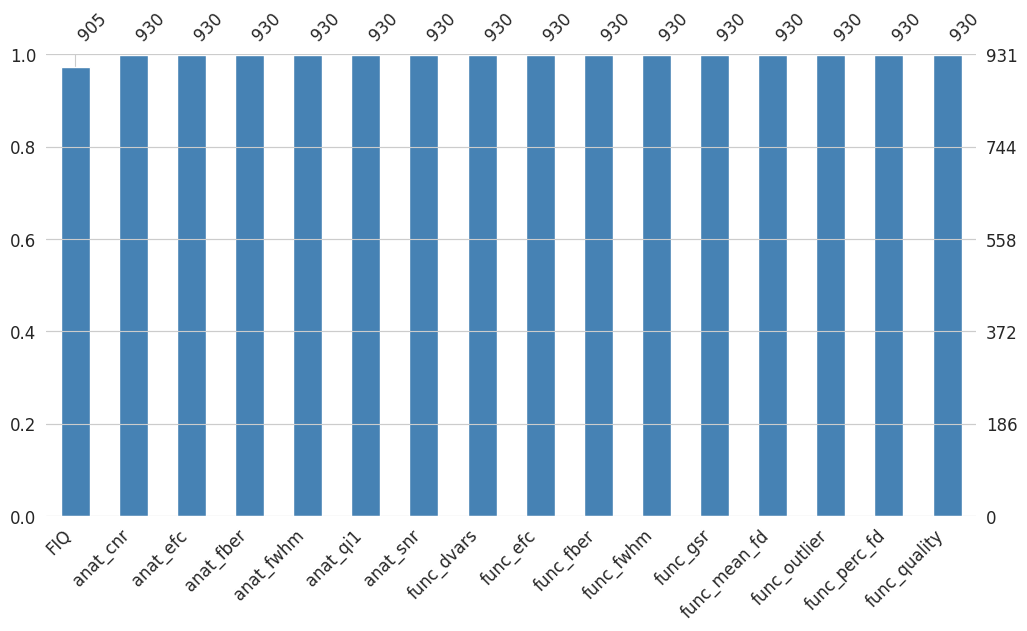

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(df_float_missing, figsize=(12, 6), fontsize=12, color='steelblue')

The dataset still contains missing values, and to address this issue, we will apply Multiple Imputation by Chained Equations (MICE) imputation, as mentioned in the article. After filtering the data based on our criteria, we will proceed with the MICE imputation to handle the remaining missing values in the dataset.

In [ ]:
df_float_missing.info()# Now we can see the type of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931 entries, 0 to 930
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FIQ           905 non-null    float64
 1   anat_cnr      930 non-null    float64
 2   anat_efc      930 non-null    float64
 3   anat_fber     930 non-null    float64
 4   anat_fwhm     930 non-null    float64
 5   anat_qi1      930 non-null    float64
 6   anat_snr      930 non-null    float64
 7   func_dvars    930 non-null    float64
 8   func_efc      930 non-null    float64
 9   func_fber     930 non-null    float64
 10  func_fwhm     930 non-null    float64
 11  func_gsr      930 non-null    float64
 12  func_mean_fd  930 non-null    float64
 13  func_outlier  930 non-null    float64
 14  func_perc_fd  930 non-null    float64
 15  func_quality  930 non-null    float64
dtypes: float64(16)
memory usage: 116.5 KB


# MICE IMPUTATION

STEPS:


1. Basically take the variable that contains missing values as a response ‘Y’ and other variables as predictors ‘X’.

2. Build a model with rows where Y is not missing.

3. Then predict the missing observations.

We do this multiple times by doing random draws of the data and taking the mean of the predictions.

In [ ]:
# need to enable iterative imputer explicitly since its still experimental
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
miss_rows = df_float_missing.isna().any(axis = 1)
df_miss = df_float_missing[miss_rows]

In [ ]:
df_miss.shape

(27, 16)

In [ ]:
df_float_missing['FIQ'].unique()

array([  119. ,   118. ,   142. ,   134. ,   110. , -9999. ,   114. ,
         109. ,    98. ,   131. ,   113. ,   103. ,    75. ,     nan,
         123. ,   116. ,    93.5,   100. ,   113.5,   148. ,   104. ,
         106. ,    89. ,    73. ,    93. ,   101. ,   127. ,   117. ,
         126. ,    97. ,   112. ,   138. ,   136. ,   105. ,   120. ,
         111.5,   111. ,   102. ,    86. ,    76. ,    91. ,    69.6,
         115. ,   122. ,   106.5,    88. ,   132. ,   129. ,    83. ,
         128. ,    98.5,   108. ,    95.5,   141. ,   137. ,   121. ,
         121.5,    90. ,    78. ,    72. ,   107. ,   125. ,    95. ,
         115.2,   139. ,   107.6,    78.5,   103.5,    99. ,    80. ,
         124. ,    92. ,    94. ,    96. ,    77. ,    92.5,    87.5,
         107.5,    79. ,    85. ,   135. ,    87. ,   108.5,    96.5,
         146. ,   130. ,   104.5,   129.5,   124.5,   110.5,   146.5,
         112.5,   115.5,    77.2,    89.5,    84. ,   127.5,   133.5,
         120.5,   10

<Axes: >

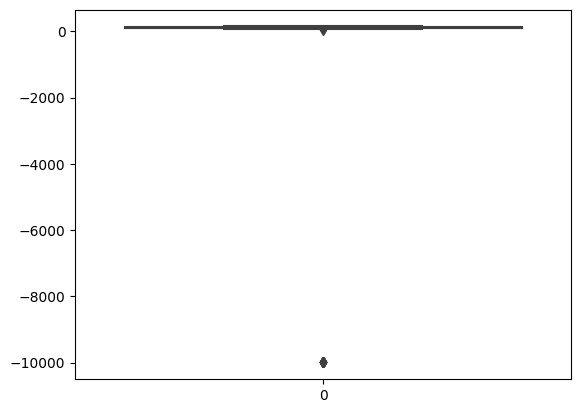

In [ ]:
sns.boxplot(df_float_missing['FIQ'])


In [ ]:
outliers = df_float_missing[df_float_missing['FIQ'] == -9999]
outliers

,FIQ,anat_cnr,anat_efc,anat_fber,anat_fwhm,anat_qi1,anat_snr,func_dvars,func_efc,func_fber,func_fwhm,func_gsr,func_mean_fd,func_outlier,func_perc_fd,func_quality
6,-9999.0,5.258132,1.436278,14.831974,2.911150,0.047992,8.450562,1.107504,0.480033,111.161146,1.995363,0.025558,0.220653,0.000660,46.766169,0.005024
8,-9999.0,2.940238,1.487330,2.540405,3.146340,0.130985,4.573468,1.178015,0.490547,101.314198,1.961812,0.036961,0.160136,0.001758,30.845771,0.005715
64,-9999.0,5.389460,1.413071,7.826634,3.236620,0.061095,7.141211,1.143517,0.495382,80.000195,1.951576,0.030638,0.094722,0.001331,6.965174,0.004288
86,-9999.0,8.382919,2.195348,7.619788,3.395290,0.154025,14.773005,1.317319,0.480779,86.052468,1.936867,0.026142,0.022373,0.001375,0.000000,0.002551
98,-9999.0,6.734932,11.565194,6.474996,2.704378,0.002896,11.720422,1.127170,0.540687,84.153029,2.328669,0.027709,0.032230,0.001020,0.332226,0.007990
147,-9999.0,4.577269,1.520595,7.211705,2.910720,0.060916,6.814600,1.138462,0.482650,104.150354,2.080765,0.035488,0.161788,0.000728,26.865672,0.010123
159,-9999.0,3.950808,1.671033,2.804149,3.553380,0.088266,6.155381,1.163657,0.482051,124.373251,2.048877,0.022641,0.199617,0.000699,39.303483,0.006747
224,-9999.0,4.221312,1.426890,7.857000,2.988560,0.066745,6.432693,1.216343,0.495054,88.843272,1.860183,0.030739,0.130655,0.003248,14.925373,0.008621
225,-9999.0,9.894660,1.815002,16.819808,3.473960,0.070962,15.448800,1.035931,0.548127,78.684485,1.849910,0.046890,0.083783,0.007047,0.947867,0.009904
326,-9999.0,4.768935,1.601895,6.335901,2.893500,0.064087,7.342628,1.097789,0.487604,79.486838,1.918145,0.042990,0.171107,0.001749,33.830846,0.007724


We can see here, there are 33 rows where the FIQ values are equal to -9999, this is going to affect the MICE imputation strategy default which is mean, so for this reason, we will replace these values for NaN and include them in our missing values list in order to avoid being affected by these outliers.

In [ ]:
df_float_missing['FIQ'] = df_float_missing['FIQ'].replace(-9999.0, np.NaN)

In [ ]:
miss_val = df_float_missing.isna().any(axis = 1)
val_null = df_float_missing[miss_val]

In [ ]:
val_null.shape

(60, 16)

Here, we have the final dataset with missing values, now we will apply the Predictive Mean Matching data imputation method using the Multivariate Imputation via Chained Equations (MICE) based on the article process performed:

In [ ]:
lr = LinearRegression() # The Predictive Mean Matching (PMM) uses Linear Regression in the MICE imputer as the estimator
imp = IterativeImputer(estimator = lr, random_state=100, max_iter=10, imputation_order="roman")

In [ ]:
imp_values = imp.fit_transform(df_float_missing)

In [ ]:
df_float_missing.loc[:,:] = imp_values

In [ ]:
null = df_float_missing.isnull().sum()
print(null[null > 0])

Series([], dtype: int64)


In [ ]:
df_float_missing['FIQ'].unique()

array([119.        , 118.        , 142.        , 134.        ,
       110.        , 107.02066371, 114.        , 109.82684071,
       109.        ,  98.        , 131.        , 113.        ,
       103.        ,  75.        , 108.77182052, 123.        ,
       116.        ,  93.5       , 100.        , 113.5       ,
       148.        , 104.        , 106.        ,  89.        ,
        73.        ,  93.        , 101.        , 127.        ,
       117.        , 126.        ,  97.        , 112.        ,
       138.        , 136.        , 105.        , 120.        ,
       111.5       , 111.        , 111.18733977, 102.        ,
        86.        , 109.3729798 ,  76.        ,  91.        ,
        69.6       , 115.        , 108.78829596, 122.        ,
       106.5       , 110.21675352,  88.        , 110.89449895,
       132.        , 129.        ,  83.        , 128.        ,
       112.23338227,  98.5       , 108.        ,  95.5       ,
       109.10403088, 141.        , 137.        , 109.97

In [ ]:
col = df_1.columns.difference(df_float_missing.columns)
df_con = df_1[col]

In [ ]:
df_final = pd.concat([df_float_missing, df_con], axis = 1)

In [ ]:
df_final.head(10)

,FIQ,anat_cnr,anat_efc,anat_fber,anat_fwhm,anat_qi1,anat_snr,func_dvars,func_efc,func_fber,func_fwhm,func_gsr,func_mean_fd,func_outlier,func_perc_fd,func_quality,AGE_AT_SCAN,DX_GROUP,EYE_STATUS_AT_SCAN,SEX,SUB_ID,SUB_IN_SMP,X,func_num_fd,qc_anat_rater_2_fail,qc_anat_rater_2_maybe,qc_anat_rater_3_fail,qc_func_rater_2_fail,qc_func_rater_2_maybe,qc_func_rater_3_fail,qc_rater_1_fail,qc_rater_1_maybe,subject
0,119.000000,10.674176,0.616051,89.045514,3.509732,0.067764,12.866070,1.018414,0.534295,78.296410,1.765660,-0.001329,0.032827,0.006217,1.104972,0.014129,19.7300,2,1,1,51131,1,815,2.0,0,0,0,0,0,0,0,0,51131
1,118.000000,7.004004,1.674990,11.113986,4.425869,0.075520,10.833468,1.064568,0.428382,137.815548,1.955725,0.010631,0.078301,0.002349,4.635762,0.008713,21.4200,1,2,1,50237,1,163,7.0,0,0,0,0,0,0,0,0,50237
2,119.000000,9.180373,14.838937,0.029120,2.824676,0.241977,9.159445,1.302140,0.555808,59.038003,2.772167,0.036467,0.181608,0.007001,28.630705,0.007197,8.2464,2,2,1,51185,1,864,69.0,0,1,0,0,0,0,0,0,51185
3,142.000000,9.087565,0.517920,78.004528,3.220905,0.055056,10.456115,0.938920,0.485962,142.036348,2.057008,-0.010039,0.030118,0.006253,0.552486,0.011202,9.5800,1,1,1,50978,0,669,1.0,0,0,0,0,0,0,0,0,50978
4,134.000000,26.045369,4.167438,32.931736,3.423460,0.058810,68.951286,1.156320,0.585246,88.589366,1.680437,0.079297,0.187709,0.001147,34.854772,0.007730,30.0000,1,2,1,50653,0,509,84.0,0,0,0,1,0,0,1,0,50653
5,110.000000,12.592915,2.854406,7.616887,3.282660,0.101390,25.763782,1.137542,0.565347,79.216368,1.871921,0.046415,0.039528,0.004377,0.497512,0.008172,11.0000,2,1,1,51357,1,1026,1.0,0,1,0,0,1,0,0,0,51357
6,107.020664,5.258132,1.436278,14.831974,2.911150,0.047992,8.450562,1.107504,0.480033,111.161146,1.995363,0.025558,0.220653,0.000660,46.766169,0.005024,36.0000,2,2,1,51569,0,1094,94.0,0,0,0,0,1,0,0,0,51569
7,114.000000,8.071939,0.492807,90.430431,3.777362,0.061024,10.065393,0.935325,0.509945,111.912491,1.811479,-0.000797,0.045803,0.005884,1.104972,0.015515,26.1700,2,1,1,51153,1,834,2.0,0,0,0,0,1,0,0,0,51153
8,109.826841,2.940238,1.487330,2.540405,3.146340,0.130985,4.573468,1.178015,0.490547,101.314198,1.961812,0.036961,0.160136,0.001758,30.845771,0.005715,42.0000,1,2,1,51580,0,1105,62.0,0,0,0,0,1,0,0,0,51580
9,109.000000,11.080846,0.416458,692.822630,3.090838,0.001943,22.997706,1.168608,0.514500,86.057649,2.492507,0.025435,0.245952,0.010103,44.518272,0.020060,11.8000,1,1,1,50316,1,240,134.0,0,1,1,0,0,0,0,0,50316


In [ ]:
null2 = df_final.isnull().sum()
print(null2[null2 > 0])

func_num_fd    1
dtype: int64


In [ ]:
df_final['func_num_fd'] = df_final['func_num_fd'].fillna(df_final['func_num_fd'].mean())

### LDA process

The response variables of the article are the variables DX_GROUP and SEX, we do not have too much information about these variables in the dataset, so we will suppose that for alphabetic order the variables are distributed as follows:

- DX_GROUP -> 1 = ASD, 2 = non-autistic (TD)
- SEX -> 1 = Female, 2 = Male

So, for the dataset we will replace the df_t colum for the target variable:

- 0: ASD female (1_1)
- 1: ASD male (1_2)
- 2: non-autistic (TD) female (2_1)
- 3: non_autistic (TD) male (2_2)

In [ ]:
df_final.head()

,FIQ,anat_cnr,anat_efc,anat_fber,anat_fwhm,anat_qi1,anat_snr,func_dvars,func_efc,func_fber,func_fwhm,func_gsr,func_mean_fd,func_outlier,func_perc_fd,func_quality,AGE_AT_SCAN,DX_GROUP,EYE_STATUS_AT_SCAN,SEX,SUB_ID,SUB_IN_SMP,X,func_num_fd,qc_anat_rater_2_fail,qc_anat_rater_2_maybe,qc_anat_rater_3_fail,qc_func_rater_2_fail,qc_func_rater_2_maybe,qc_func_rater_3_fail,qc_rater_1_fail,qc_rater_1_maybe,subject
0,119.0,10.674176,0.616051,89.045514,3.509732,0.067764,12.866070,1.018414,0.534295,78.296410,1.765660,-0.001329,0.032827,0.006217,1.104972,0.014129,19.7300,2,1,1,51131,1,815,2.0,0,0,0,0,0,0,0,0,51131
1,118.0,7.004004,1.674990,11.113986,4.425869,0.075520,10.833468,1.064568,0.428382,137.815548,1.955725,0.010631,0.078301,0.002349,4.635762,0.008713,21.4200,1,2,1,50237,1,163,7.0,0,0,0,0,0,0,0,0,50237
2,119.0,9.180373,14.838937,0.029120,2.824676,0.241977,9.159445,1.302140,0.555808,59.038003,2.772167,0.036467,0.181608,0.007001,28.630705,0.007197,8.2464,2,2,1,51185,1,864,69.0,0,1,0,0,0,0,0,0,51185
3,142.0,9.087565,0.517920,78.004528,3.220905,0.055056,10.456115,0.938920,0.485962,142.036348,2.057008,-0.010039,0.030118,0.006253,0.552486,0.011202,9.5800,1,1,1,50978,0,669,1.0,0,0,0,0,0,0,0,0,50978
4,134.0,26.045369,4.167438,32.931736,3.423460,0.058810,68.951286,1.156320,0.585246,88.589366,1.680437,0.079297,0.187709,0.001147,34.854772,0.007730,30.0000,1,2,1,50653,0,509,84.0,0,0,0,1,0,0,1,0,50653


In [ ]:
# Creating the target variable for the 4 groups:
df_final['df_t'] = df_final['DX_GROUP'].astype(str) + '_' + df_final['SEX'].astype(str)

In [ ]:
df_final['df_t']# we can see the groups

0      2_1
1      1_1
2      2_1
3      1_1
4      1_1
      ... 
926    2_2
927    1_2
928    1_1
929    1_1
930    2_1
Name: df_t, Length: 931, dtype: object

In [ ]:
df_final['target'] = df_final['df_t'].map({'1_1':0, '1_2':1, '2_1':2, '2_2':3})

In [ ]:
df_final['target']# The final groups

0      2
1      0
2      2
3      0
4      0
      ..
926    3
927    1
928    0
929    0
930    2
Name: target, Length: 931, dtype: int64

In [ ]:
df_final = df_final.drop(['df_t', 'DX_GROUP', 'SEX'], axis = 1)

In [ ]:
df_final.head()

,FIQ,anat_cnr,anat_efc,anat_fber,anat_fwhm,anat_qi1,anat_snr,func_dvars,func_efc,func_fber,func_fwhm,func_gsr,func_mean_fd,func_outlier,func_perc_fd,func_quality,AGE_AT_SCAN,EYE_STATUS_AT_SCAN,SUB_ID,SUB_IN_SMP,X,func_num_fd,qc_anat_rater_2_fail,qc_anat_rater_2_maybe,qc_anat_rater_3_fail,qc_func_rater_2_fail,qc_func_rater_2_maybe,qc_func_rater_3_fail,qc_rater_1_fail,qc_rater_1_maybe,subject,target
0,119.0,10.674176,0.616051,89.045514,3.509732,0.067764,12.866070,1.018414,0.534295,78.296410,1.765660,-0.001329,0.032827,0.006217,1.104972,0.014129,19.7300,1,51131,1,815,2.0,0,0,0,0,0,0,0,0,51131,2
1,118.0,7.004004,1.674990,11.113986,4.425869,0.075520,10.833468,1.064568,0.428382,137.815548,1.955725,0.010631,0.078301,0.002349,4.635762,0.008713,21.4200,2,50237,1,163,7.0,0,0,0,0,0,0,0,0,50237,0
2,119.0,9.180373,14.838937,0.029120,2.824676,0.241977,9.159445,1.302140,0.555808,59.038003,2.772167,0.036467,0.181608,0.007001,28.630705,0.007197,8.2464,2,51185,1,864,69.0,0,1,0,0,0,0,0,0,51185,2
3,142.0,9.087565,0.517920,78.004528,3.220905,0.055056,10.456115,0.938920,0.485962,142.036348,2.057008,-0.010039,0.030118,0.006253,0.552486,0.011202,9.5800,1,50978,0,669,1.0,0,0,0,0,0,0,0,0,50978,0
4,134.0,26.045369,4.167438,32.931736,3.423460,0.058810,68.951286,1.156320,0.585246,88.589366,1.680437,0.079297,0.187709,0.001147,34.854772,0.007730,30.0000,2,50653,0,509,84.0,0,0,0,1,0,0,1,0,50653,0


In [ ]:
# CREATING THE MODEL:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df_final.drop(['target'], axis=1)
y = df_final[['target']]

In [ ]:
# Scaling the data:
sc = StandardScaler()

#Fit and tranform the data
X_scl = sc.fit_transform(X)

In [ ]:
# The article mentions 75% of the data was use for training, 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X_scl, y, test_size = 0.25, random_state = 42)

In [ ]:
lda = LDA()
lda_model = lda.fit(X_train, y_train)

In [ ]:
lda_model.explained_variance_ratio_

array([0.83998613, 0.11353641, 0.04647746])

We found similar Discriminant axes that explain the the variance. LDA1= 84%, LDA2= 11.35%, LDA3 = 4.65%. Our results our similar to the results of the article.

In [ ]:
y_pred = lda_model.predict(X_test)

In [ ]:
accuracy_score = lda_model.score(X_test, y_test)
print('Model accuracy {0}'.format(accuracy_score))

Model accuracy 0.6008583690987125


In [ ]:
# Evaluationg the model performance using classification report (precision, recall, f1-score)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.60      0.59        88
           1       0.33      0.12      0.17        17
           2       0.66      0.60      0.63       101
           3       0.56      0.89      0.69        27

    accuracy                           0.60       233
   macro avg       0.53      0.55      0.52       233
weighted avg       0.59      0.60      0.59       233



<Axes: >

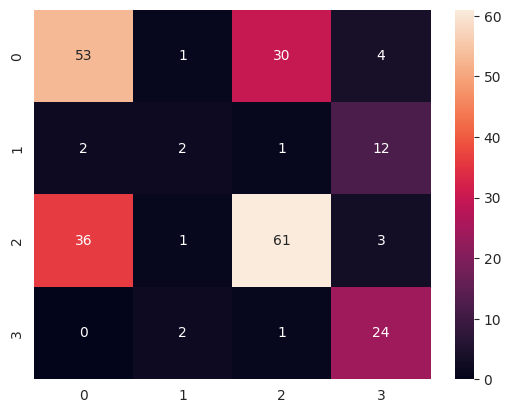

In [ ]:
# Predicting the Test set results
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
# Testing the model including Cross Validation with 10 times repetitions
k = KFold(n_splits = 10, random_state = 1, shuffle = True)
cv_scores = cross_val_score(lda_model, X_train, y_train, cv = k)

In [ ]:
# Cross Validation accuracy
print('Model accuracy {0}'.format(cv_scores.mean()))

Model accuracy 0.5660041407867495


In [ ]:
#Sensitivity and Specificity of our model
# Define the group mappings
from sklearn.metrics import confusion_matrix

group_mapping = {
    0: 'ASD female',
    1: 'ASD male',
    2: 'non-autistic female',
    3: 'non-autistic male'
}

# Calculate confusion matrix for each group
group_confusion_matrices = {}
for group_code, group_name in group_mapping.items():
    group_y_test = (y_test == group_code)
    group_y_pred = (y_pred == group_code)
    group_confusion_matrices[group_name] = confusion_matrix(group_y_test, group_y_pred)

# Calculate sensitivity and specificity for each group
group_metrics = {}
for group_name, confusion_matrix in group_confusion_matrices.items():
    tn, fp, fn, tp = confusion_matrix.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    group_metrics[group_name] = {'sensitivity': sensitivity, 'specificity': specificity}

# Print the results for each group
for group_name, metrics in group_metrics.items():
    print(group_name)
    print("Sensitivity:", metrics['sensitivity'])
    print("Specificity:", metrics['specificity'])
    print()

ASD female
Sensitivity: 0.6022727272727273
Specificity: 0.7379310344827587

ASD male
Sensitivity: 0.11764705882352941
Specificity: 0.9814814814814815

non-autistic female
Sensitivity: 0.6039603960396039
Specificity: 0.7575757575757576

non-autistic male
Sensitivity: 0.8888888888888888
Specificity: 0.9077669902912622



### Model's Conclusion and its comparison vs the article's conclusion:

The results of our model are:

- Overall model accuracy: 60.085%
- Model accuracy performing Cross Validation 10 times: 56.6%
- Model Precision: ASD female (0) = 58%, ASD male (1) = 33%, TD female (2) = 66%, TD male (3) = 56%
- Model Recall: ASD female (0) = 60%, ASD male (1) = 12%, TD female (2) = 60%, TD male (3) = 89%
- Model F1 - score: ASD female (0) = 59%, ASD male (1) = 17%, TD female (2) = 63%, TD male (3) = 69%

Comparting our models results vs the article results we have:

- Our model result without performing the cross-validation is 60.08% which means the performance of the model is close to the article model's performance result (62.77%).
- Our model result performing the cross-validation is 56.6%, this result is a little bit lower than the article model's performance, but still, it is considered a moderate accuracy.
- Model Precision: The article model's precision results are ASD female = 56%, ASD male = 70.37%, TD female = 64.29%, and TD male = 60.71%, here we can see that our Precision results are similar to the article model's Precision results, the only values with the highest difference are the ASD male results.
- Model Balanced Accuracy: The article model's Balanced Accuracy results are ASD female = 72.69%, ASD male = 79.22%, TD female = 68%, and TD male = 79.21%, here we can see that our Recall results are lower than the article model's Balanced Accuracy results.
- Model F1 - score: The article model's F1 - score are ASD female = 58.33%, ASD male = 70.37%, TD female = 51.43%, TD male = 66.67%, here we can see that our F1 - score results are similar to the article model's F1 - score results, the only values with the highest difference are the ASD male results.



Now we are going to compare sensitivity and specificity of article's LDA vrs our model LDA.


## Article's LDA Classification report

| Indicator | ASD female | ASD male | TD female | TD male |
|---|---|---|---|---|
| Sensitivity | 60.87% | 70.37% | 42.86% | 73.91% |
| Specificity | 84.51% | 88.06% | 93.15% | 84.51% |


# Our LDA Classification report

| Indicator | ASD female | ASD male | TD female | TD male |
|---|---|---|---|---|
| Sensitivity | 60.23% | 11.76% | 60.40% | 88.89% |
| Specificity | 73.80% | 98.15% | 75.75% | 90.78% |

Based on the results, it can be observed that the article's LDA model generally outperforms our replicated LDA model in terms of sensitivity for most groups. However, our replicated LDA model exhibits higher specificity for ASD males compared to the article's LDA model.This indicates that our replicated LDA model exhibits better performance in correctly identifying non-autistic (TD) males as non-autistic. It suggests that our model have the ability to correctly identify true negatives (non-autistic individuals) within that category.However,  model's ability to correctly identify true positives (autistic individuals) is not good and Sensitivity it is typically more important in the context of autism classification.

Further analysis and improvements may be necessary to enhance the performance of our LDA model in order to match or exceed the results of the article's LDA model.




## 3. Perform another classification analysis (15 points).


Using Random Forest Classifiers as another Classification Technique

In [ ]:
# First, we are going to look for the best parameters

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV
forest_param= {'max_depth': list(range(10,15)),
               'max_features': list(range(0,14)),
               'n_estimators':[10,25,50,75,100]}
grid_search = GridSearchCV(estimator = rfc,
                           param_grid = forest_param,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


result = grid_search.fit(X, y)

In [ ]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.763699614743258
Best Hyperparameters: {'max_depth': 14, 'max_features': 8, 'n_estimators': 100}


Using the best parameteres in our Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=14,max_features=8, random_state=0)
rfc.fit(X_train, y_train)

y_pred=rfc.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7296137339055794


In [ ]:
#Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.88      0.76        88
           1       0.50      0.18      0.26        17
           2       0.84      0.71      0.77       101
           3       0.69      0.67      0.68        27

    accuracy                           0.73       233
   macro avg       0.67      0.61      0.62       233
weighted avg       0.73      0.73      0.72       233



In [ ]:
# Testing the model including Cross Validation with 10 times repetitions
k = KFold(n_splits = 10, random_state = 0, shuffle = True)
cv_scores = cross_val_score(rfc, X_train, y_train, cv = k)

In [ ]:
# Cross Validation accuracy
print('Model accuracy {0}'.format(cv_scores.mean()))

Model accuracy 0.7378260869565217


In [ ]:
#Sensitivity and Specificity of our model
# Define the group mappings
from sklearn.metrics import confusion_matrix

group_mapping = {
    0: 'ASD female',
    1: 'ASD male',
    2: 'non-autistic female',
    3: 'non-autistic male'
}

# Calculate confusion matrix for each group
group_confusion_matrices = {}
for group_code, group_name in group_mapping.items():
    group_y_test = (y_test == group_code)
    group_y_pred = (y_pred == group_code)
    group_confusion_matrices[group_name] = confusion_matrix(group_y_test, group_y_pred)

# Calculate sensitivity and specificity for each group
group_metrics = {}
for group_name, confusion_matrix in group_confusion_matrices.items():
    tn, fp, fn, tp = confusion_matrix.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    group_metrics[group_name] = {'sensitivity': sensitivity, 'specificity': specificity}

# Print the results for each group
for group_name, metrics in group_metrics.items():
    print(group_name)
    print("Sensitivity:", metrics['sensitivity'])
    print("Specificity:", metrics['specificity'])
    print()

ASD female
Sensitivity: 0.875
Specificity: 0.7379310344827587

ASD male
Sensitivity: 0.17647058823529413
Specificity: 0.9861111111111112

non-autistic female
Sensitivity: 0.7128712871287128
Specificity: 0.8939393939393939

non-autistic male
Sensitivity: 0.6666666666666666
Specificity: 0.9611650485436893



## 4.Conclusion on the performance of LDA in comparison to the technique that you use.

### Model's Conclusion and its comparison Random Forest Classifiers  vs LDA model:

The results of  Random Forest Classifiers are:

- Overall model accuracy: 73%
- Model accuracy performing Cross Validation 10 times: 73.8%
- Model Precision: ASD female (0) = 67%, ASD male (1) = 50%, TD female (2) = 84%, TD male (3) = 69%
- Model Recall: ASD female (0) = 88%, ASD male (1) = 18%, TD female (2) = 71%, TD male (3) = 67%
- Model F1 - score: ASD female (0) = 76%, ASD male (1) = 26%, TD female (2) = 77%, TD male (3) = 68%

Comparting our models results vs the LDA results we have:

- Our model result without performing the cross-validation is 72.96% which means the performance of the model is better to the article model's performance result (62.77%) and better of our LDA performance(60.08%)
- Our model result performing the cross-validation is 73.78%, this result is better  than the article model's performance and better than our LDA (56.6%)

Compare precision with LDA and Random


- Model Precision: The article model's precision results are ASD female = 56%, ASD male = 70.37%, TD female = 64.29%, and TD male = 60.71%, here we can see that our Precision results are similar to the article model's Precision results, the only values with the highest difference are the ASD male results.
- Model Balanced Accuracy: The article model's Balanced Accuracy results are ASD female = 72.69%, ASD male = 79.22%, TD female = 68%, and TD male = 79.21%, here we can see that our Recall results are lower than the article model's Balanced Accuracy results.
- Model F1 - score: The article model's F1 - score are ASD female = 58.33%, ASD male = 70.37%, TD female = 51.43%, TD male = 66.67%, here we can see that our F1 - score results are similar to the article model's F1 - score results, the only values with the highest difference are the ASD male results.

## LDA


| Indicator | ASD female | ASD male | TD female | TD male |
|---|---|---|---|---|
| Precision | 58% | 33% | 66% | 56% |
| Recall | 60% | 12% | 60% | 89% |
| f1-score | 59% | 17% | 63% | 69% |



# Random Forest Classifier


| Indicator | ASD female | ASD male | TD female | TD male |
|---|---|---|---|---|
| Precision | 67% | 50% | 84% | 69% |
| Recall | 88% | 18% | 71% | 67% |
| f1-score | 76% | 26% | 77% | 68% |


As we can easily see the Random Forest Clasiffier provide higher Accuracy and also better classification statistics. We have to remember that always there is a threshold between bias and variance. So we can have a higher precision and we can have a low Recall. It is always depende of our dataset.

To improve our model, we utilized the optimized parameter settings and applied the Random Forest algorithm. By employing these higher-tuned parameters, we aimed to enhance the performance and accuracy of our model. Random Forest is a powerful ensemble learning technique that combines multiple decision trees to make robust predictions. This approach allows for improved generalization and can effectively handle complex data patterns.

Now we are going to compare sensitivity and specificity LDA vrs Random Forest Classifiers.

# Our LDA Classification report

| Indicator | ASD female | ASD male | TD female | TD male |
|---|---|---|---|---|
| Sensitivity | 60.23% | 11.76% | 60.40% | 88.89% |
| Specificity | 73.80% | 98.15% | 75.75% | 90.78% |



## Random Forest Classification report

| Indicator | ASD female | ASD male | TD female | TD male |
|---|---|---|---|---|
| Sensitivity | 87.50% | 17.65% | 71.28% | 66.67% |
| Specificity | 73.80% | 98.61% | 89.39% | 96.12% |


Overall, the Random Forest model outperformed our LDA model in terms of sensitivity for most groups, except for TD males. The Random Forest model also showed higher specificity for most groups compared to our LDA model. These results indicate that the Random Forest model generally performs better in accurately identifying positive cases (sensitivity) and negative cases (specificity) within the different groups of ASD and non-autistic individuals.




